## ML01 P4

# Continuous Target Prediction Using Regression
# **Author:** Brenda Fuemmeler
# **Date:** November 12, 2025
# **Objective:** Predicting a continous numeric target.

## Introduction
This project uses the Titanic dataset to predict a continuous numeric target.  Our goal is to predict fare.

## Imports

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Section 1. Import and Inspect the data

### 1.1 Load the dataset and display the first 10 rows
Load the titanic dataset directly from the seaborn library for consistency and simplicity.

Example code:

data_frame = sns.load_dataset("titanic")
data_frame.head(10)

In [3]:
# Load the data
data_frame = sns.load_dataset("titanic")

# Might be large. Display just the first 10 rows
data_frame.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Section 2- Data Exploration and Preparation
## 2.1 Handle missing values and clean data
- Impute missing values for age using median
- Drop rows with missing fare (or impute if preferred)
- Create numeric variables (e.g., family_size from sibsp + parch + 1)- 

In [23]:
import pandas as pd

titanic = pd.read_csv("titanic.csv")  
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)

titanic = titanic.dropna(subset=["Fare"])

titanic["Family_size"] = titanic["SibSp"] + titanic["Parch"] + 1

C:\Users\fuemm\AppData\Local\Temp\ipykernel_8904\3178078525.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace=True)


# Section 3- Feature Selection and Justification
- Define multiple cominations of features to use as inputs to predict fare.

In [25]:
# Case 1. age
X1 = titanic[["Age"]]
y1 = titanic["Fare"]

In [26]:
# Case 2. family_size
X2 = titanic[["Family_size"]]
y2 = titanic["Fare"]

In [28]:
# Case 3. age, family_size
X3 = titanic[["Age", "Family_size"]]
y3 = titanic["Fare"]

In [29]:
# Case 4. PClass
X4 = titanic[["Pclass"]]
y4 = titanic["Fare"]

## Reflection
Why might these features affect a passenger’s fare?
Passenger fare was influenced by several factors. Young children and senior citizens often received reduced pricing. Families traveling together in larger groups may have received discounts. The ticket class was likely the biggest determining factor in the cost of one's fare. 

List all available features: 
PassengerID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

Which other features could improve predictions and why?
Pclass- This feature is likely a direct indicator of economic status. 
Cabin- First-class passengers would have private cabins. Deck level indicated by cabin letters would also determine fare.
Embarked- The starting point of the passenger's journey would influence pricing in that a longer trip would be higher, a short trip lower.
Ticket- Some ticket prefixes represent group bookings or special accommodations. These could indirectly affect fare.
Sex and Age- These demographics can reflect socioeconomic patterns which we know influences ticket purchasing ability.
Family size- Large families may have received reduced rates.

How many variables are in your Case 4: One

Which variable(s) did you choose for Case 4 and why do you feel it could make a good input?
Pclass
I chose Pclass because I wanted to see how the economic attributes of a passenger could affect their fare. Ticket class determines cabin type, dining options and other amenities and therefore has a direct impact on price of fare.
 

# Section 4- Train a Regression Model
## 4.1- Split the Data

In [31]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

## 4.2- Train and Evaluate Linear Regression Models 

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions
y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)


# 4.3- Report Performance

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))

rmse1 = np.sqrt(mean_squared_error(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", rmse1)

print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))


Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364


In [43]:
print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))

rmse1 = np.sqrt(mean_squared_error(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", rmse1)

print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641


In [44]:
print("Case 3: Training R²:", r2_score(y3_train, y3_pred_train))
print("Case 3: Test R²:", r2_score(y3_test, y3_pred_test))

rmse1 = np.sqrt(mean_squared_error(y3_test, y3_pred_test))
print("Case 3: Test RMSE:", rmse1)

print("Case 3: Test MAE:", mean_absolute_error(y3_test, y3_pred_test))

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688


In [45]:
print("Case 4: Training R²:", r2_score(y4_train, y4_pred_train))
print("Case 4: Test R²:", r2_score(y4_test, y4_pred_test))

rmse1 = np.sqrt(mean_squared_error(y4_test, y4_pred_test))
print("Case 4: Test RMSE:", rmse1)

print("Case 4: Test MAE:", mean_absolute_error(y4_test, y4_pred_test))

Case 4: Training R²: 0.3005588037487471
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 31.7873316928033
Case 4: Test MAE: 20.653703671484056


## Section 4 Reflection
Compare the train vs test results for each.

Did Case 1 overfit or underfit? Case 1 (Age) underfit  
Explain: Training R2 is extremely low, which means the model shows less than 1% of the variation in Fare. Test R2 is also extremely low (.0034).

Did Case 2 overfit or underfit? Case 2 (Family Size) underfit
Explain: Training R2 is also low at .0499, meaning the model shows only a 5% variation in fare. Test R2 (.0222) is very low. 

Did Case 3 overfit or underfit? Case 3 (Age and Family Size) underfit, but performed better than Case 1 or 2.
Explain: Training R2 of 7.3% shows more of a variation. Test R2 is also a bit higher at 4.98%. This would mean a combination of Age and Family may have an impact on fare.

Did Case 4 overfit or underfit? Case 4 (Pclass) did not overfit or underfit
Explain: Training R2 of 30% and Test R2 of 30% gives a much better model. 

Adding Age:
Did adding age improve the model? No
Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): While we initially might think Age would strongly influence price of fare, this model shows us that Age alone did not have much of an affect. 

Worst:
Which case performed the worst: Case 1 (Age)
How do you know: By comparing Training R2 and Test R2 among all 4 cases, Case 1 had the lowest results.
Do you think adding more training data would improve it (and why/why not): Given the extremely low results by only using Age, I don't believe adding more training data would improve the score enough to add predictive power to the model. 

Best:
Which case performed the best: Case 4 (Pclass)
How do you know: Case 4 had the best fit results for Training R2 and Test R2.
Do you think adding more training data would improve it (and why/why not): Adding training data could improve the results, but it wouldn't be by much. I would need to add more predictive features in order to improve results by a significant amount.

# Section 5- Compare Alternative Models

In [49]:
# 5.1- Ridge Regression (L2 Penalty)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

In [50]:
# 5.2 Elastic Net (L1 + L2 combined)
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

In [54]:
# 5.3 Polynomial Regression
# Set up the poly inputs

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)

# Predictions
y4_pred_poly = poly_model.predict(X4_train_poly)
y4_pred_poly_test = poly_model.predict(X4_test_poly)

c:\Repos\applied-ml-fuemmeler\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


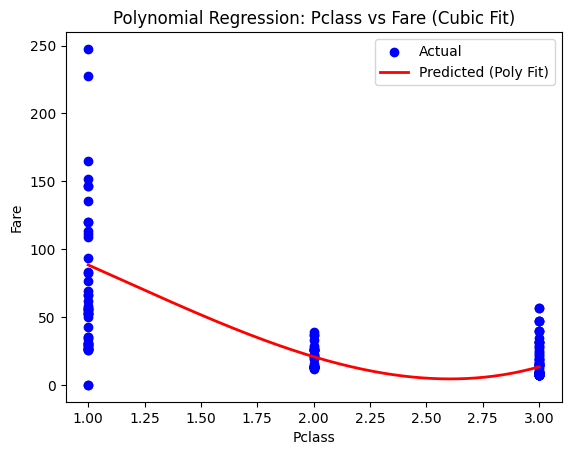

In [62]:
# 5.4 Visualize Polynomial Cubic Fit for Case 4: Pclass
import numpy as np
import matplotlib.pyplot as plt

# Flatten or select the column
X_plot = X4_test.to_numpy().ravel()  # shape (n_samples,)
y_actual = y4_test

# Create smooth X values for plotting the curve
X_smooth = np.linspace(X_plot.min(), X_plot.max(), 200).reshape(-1, 1)

# Transform smooth X values for polynomial prediction
X_smooth_poly = poly.transform(X_smooth)
y_smooth_pred = poly_model.predict(X_smooth_poly)

# Plot
plt.scatter(X_plot, y_actual, color="blue", label="Actual")
plt.plot(X_smooth, y_smooth_pred, color="red", label="Predicted (Poly Fit)", linewidth=2)
plt.xlabel("Pclass")  # replace with your feature name if different
plt.ylabel("Fare")
plt.title("Polynomial Regression: Pclass vs Fare (Cubic Fit)")
plt.legend()
plt.show()


# 5.4 Reflections (in a Markdown cell):

What patterns does the cubic model seem to capture: This model captures non-linear relationships between Pclass and fare. 

Where does it perform well or poorly:
Performs well: This model performs well at the extremes (1st class, 3rd class). 
Performs poorly: This model performs poorly at extremely high or low fares within a class (outliers).

Did the polynomial fit outperform linear regression:  Yes, for Case 4 the polynomial model slightly outperforms the linear regression fit.  

Where (on the graph or among which kinds of data points) does it fit best: The polynomial fit works best for typical Pclass values, but struggles with outliers.  This is because the points deviate from the main trend.

In [64]:
# 5.4 Compare All Models
# Create a summary table or printout comparing all models:

def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} MAE: {mae:.2f}\n")

In [72]:
# Case 4
report("Linear (Case 4)", y4_test, y4_pred_test)
report("Ridge (Case 4)", y4_test, y_pred_ridge)
report("ElasticNet (Case 4)", y4_test, y_pred_elastic)
report("Polynomial (Case 4)", y4_test, y_pred_poly)

Linear (Case 4) R²: 0.302
Linear (Case 4) RMSE: 31.79
Linear (Case 4) MAE: 20.65

Ridge (Case 4) R²: 0.302
Ridge (Case 4) RMSE: 31.77
Ridge (Case 4) MAE: 20.64

ElasticNet (Case 4) R²: 0.339
ElasticNet (Case 4) RMSE: 30.92
ElasticNet (Case 4) MAE: 19.93

Polynomial (Case 4) R²: 0.336
Polynomial (Case 4) RMSE: 30.99
Polynomial (Case 4) MAE: 19.25



c:\Repos\applied-ml-fuemmeler\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Repos\applied-ml-fuemmeler\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Repos\applied-ml-fuemmeler\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Repos\applied-ml-fuemmeler\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Repos\applied-ml-fuemmeler\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fit

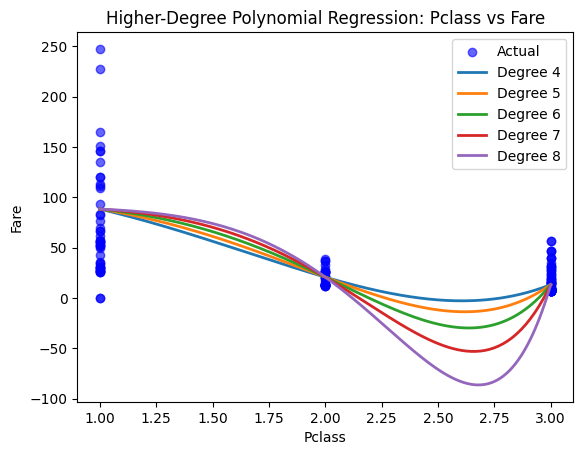

In [ ]:
# 5.5 Visualize Higher Order Polynomial (for Case 4)
# Use the same single input case as you visualized above, but use a higher degree polynomial (e.g. 4, 5, 6, 7, or 8). Plot the result. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Flatten the feature
X_plot = X4_test.to_numpy().ravel()
y_actual = y4_test

# Generate smooth x-values for plotting curves
X_smooth = np.linspace(X_plot.min(), X_plot.max(), 200).reshape(-1, 1)

# Plot the actual points
plt.scatter(X_plot, y_actual, color="blue", label="Actual", alpha=0.6)

# Fit and plot polynomials of degree 4-8
for degree in range(4, 9):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X4_train)  # transform training data
    X_smooth_poly = poly.transform(X_smooth)     # transform smooth x for plotting
    
    model = LinearRegression()
    model.fit(X_train_poly, y4_train)
    
    y_smooth_pred = model.predict(X_smooth_poly)
    
    plt.plot(X_smooth, y_smooth_pred, label=f"Degree {degree}", linewidth=2)

# Plot settings
plt.xlabel("Pclass")  # or your feature name
plt.ylabel("Fare")
plt.title("Higher-Degree Polynomial Regression: Pclass vs Fare")
plt.legend()
plt.show()



# 5.5 Which option seems to work better and why?
Comparison of cubic polynomial (degree 3) and higher-order polynomials (degrees 4-8)
The cubic model appears to work better overall.  It captures the non-linear trend of how fare increases with Pclass without overfitting to individual outliers. Higher-degree polynomials are sensitive to outliers, which makes predictions less stable. Higher-degree polynomials might increase the Training R2 slightly, but they usually do not improve the overall test performance.

# Section 6- Final Thoughts and Insights
6.1 Summarize Findings
What features were most useful? I found "Pclass" was the most useful feature for predicting fare. Age and Family Size did not show useful results.

What regression model performed best? Cubic Polynomial (degree 3) model performed best. 

How did model complexity or regularization affect results? When trying the higher-order polynomial (4-8) model, we took a risk of overfitting. Regularization did not seem to improve results when using one predictor. The cubic polynomial is less complex, giving us the best balance in results.

 
6.2 Discuss Challenges
Was fare hard to predict? Why?  Predicting fare was slightly hard as we were only using one feature. Given the large variance in classes, we also saw a high variance in fare. We also found that Age and Family Size were weaker features that did not give us much assistance in predicting fare.

Did skew or outliers impact the models?  Yes. Very high fares create outliers, which resulted in a right-skewed distribution. 
